In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [4]:
classifier= Sequential() # Initialise the CNN


In [5]:
# Ist step of Convoltional layer to get feature maps using feature detector

classifier.add(Convolution2D(filters=32, # output feature maps
                             kernel_size=(3,3), # matrix size for feature detector
                             input_shape=(64, 64, 3), # input image shape, 3 is for rgb coloured image with 128*128 px
                             kernel_initializer='he_uniform', # weights distriution
                             activation='relu')) # activation function

In [6]:
# 2nd Pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [7]:
#2nd convolutional and pooling layer.
classifier.add(Convolution2D(filters=32,
                             kernel_size=(3,3), 
                             kernel_initializer='he_uniform', 
                             activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [8]:
# Step 3 - Flattening
classifier.add(Flatten())

In [9]:
#Step 4 full connection in which input we have from flattening

classifier.add(Dense(units=128,kernel_initializer='glorot_uniform', activation='relu')) 
#step 5 output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
#applying all the transformation we want to apply to training data set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
#Rescling the test data set images to use for validation.
test_datagen= ImageDataGenerator(rescale=1./255)

In [13]:
#Getting My training data ready for validation, so it will read all the data with the px size we gave.

training_set= train_datagen.flow_from_directory(directory= ('D:/Deep Learning/Project/Strawberry Dataset/DATASET/Train_dataset'),
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=20,
                                               class_mode='binary' # for 2 class binary 
                                               )

Found 2193 images belonging to 2 classes.


In [14]:
#Getting My test data ready for validation, so it will read all the data with the px size we gave.

test_set= test_datagen.flow_from_directory(directory= 'D:/Deep Learning/Project/Strawberry Dataset/DATASET/Test_dataset',
                                               target_size=(64,64), # As we choose 64*64 for our convolution model
                                               batch_size=20,
                                           
                                               class_mode='binary' # for 2 class binary
                                          )

Found 2193 images belonging to 2 classes.


In [28]:
# Training the model
history = classifier.fit(training_set, epochs=10, validation_data=test_set)

# Accessing the history parameters
print(history.params)

Epoch 1/10
110/110 [==============================] - 67s 609ms/step - loss: 0.1739 - accuracy: 0.9270 - val_loss: 0.1101 - val_accuracy: 0.9549
Epoch 2/10
110/110 [==============================] - 77s 706ms/step - loss: 0.1611 - accuracy: 0.9339 - val_loss: 0.1015 - val_accuracy: 0.9599
Epoch 3/10
110/110 [==============================] - 71s 647ms/step - loss: 0.1558 - accuracy: 0.9384 - val_loss: 0.1075 - val_accuracy: 0.9585
Epoch 4/10
110/110 [==============================] - 54s 497ms/step - loss: 0.1468 - accuracy: 0.9403 - val_loss: 0.1187 - val_accuracy: 0.9567
Epoch 5/10
110/110 [==============================] - 48s 437ms/step - loss: 0.1463 - accuracy: 0.9412 - val_loss: 0.1238 - val_accuracy: 0.9489
Epoch 6/10
110/110 [==============================] - 48s 436ms/step - loss: 0.1348 - accuracy: 0.9485 - val_loss: 0.0968 - val_accuracy: 0.9580
Epoch 7/10
110/110 [==============================] - 55s 502ms/step - loss: 0.1424 - accuracy: 0.9412 - val_loss: 0.0837 - val_ac

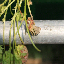

1/1 [==============================] - 0s 31ms/step
Unhealthy Strawberry


In [184]:
import numpy as np
from keras.preprocessing import image
from PIL import Image
from IPython.display import display
test_image = image.load_img("D:/Deep Learning/Project/Strawberry Dataset/DATASET/Test_dataset/Test/gray_mold590.jpg", target_size = (64, 64))
display(test_image)
# Loading the image and converting the pixels into array whcih will be used as input to predict.
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Healthy Strawberry '
else:
    prediction = 'Unhealthy Strawberry'
print(prediction)

In [185]:
scores = classifier.evaluate(test_set)

110/110 [==============================] - 20s 184ms/step - loss: 0.0795 - accuracy: 0.9708


In [186]:
scores

[0.07948241382837296, 0.9708162546157837]

In [187]:
history

In [188]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [189]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.17385216057300568,
 0.1610853672027588,
 0.1557706743478775,
 0.14678439497947693,
 0.1462993621826172]

In [190]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [191]:
import matplotlib.pyplot as plt

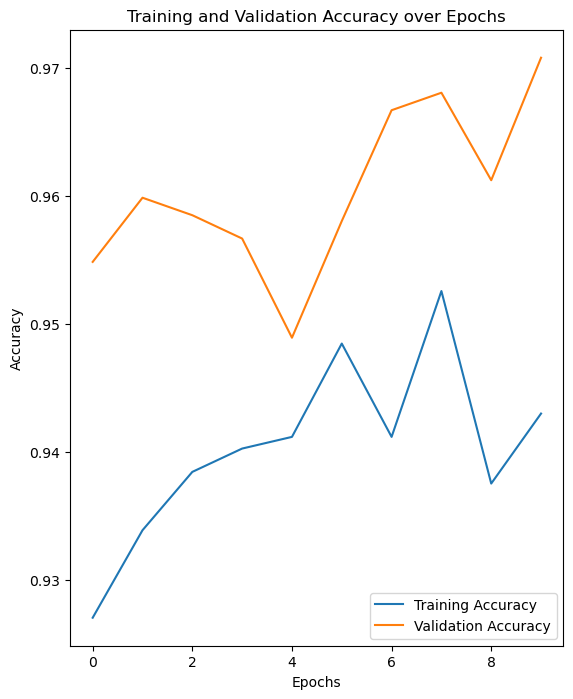

In [192]:
history = history

# Accessing the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Number of epochs
EPOCHS = len(train_acc)

# Plotting the accuracy
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), train_acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.show()

In [193]:
classifier.save('strawberry_disease_inception_model.keras')